In [ ]:
!pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 92kB 4.7MB/s 


In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:41275 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 13.65 GB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = dd.read_csv(r"E:\TLC_csvs_pro\yellow_car_data_2018\*.csv")
df = dd.read_csv("/content/drive/MyDrive/gl/CAPSTONE/Shared_folder_final/yellow_car_data_2018/*.csv")

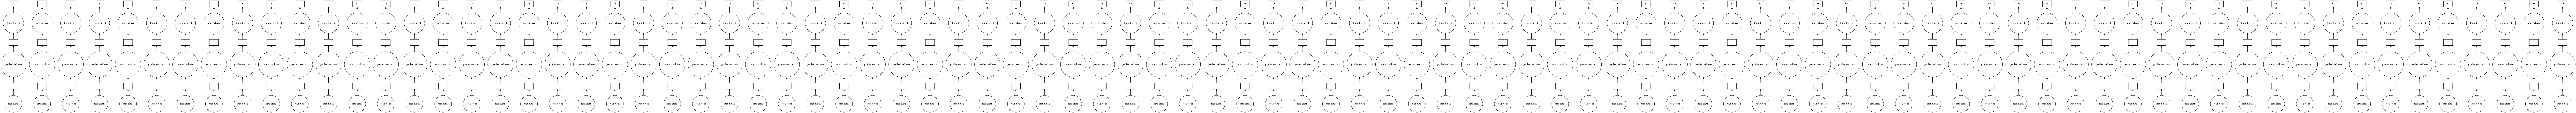

In [ ]:
df.visualize()

In [ ]:
df.columns

Index(['date', 'time_code', 'pulid', 'dolid', 'duration', 'weekday',
       'distance', 'totalSnow_cm', 'FeelsLikeC', 'precipMM'],
      dtype='object')

### Data Cleaning

#### 1. Analysis of Trip Distance

Box plot showing distribution of trip distance

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df.distance)
plt.xlabel("distance(miles)", size=10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/distributed/protocol/core.py", line 114, in loads
    header = msgpack.loads(header, use_list=False, **msgpack_opts)
  File "msgpack/_unpacker.pyx", line 195, in msgpack._cmsgpack.unpackb
ValueError: tuple is not allowed for map key
distributed.core - ERROR - tuple is not allowed for map key
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/distributed/core.py", line 386, in handle_stream
    msgs = yield comm.read()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1133, in run
    

CancelledError: ignored

<Figure size 720x216 with 0 Axes>

In [ ]:
df['distance'].describe(percentiles=[.98,.99,.995,.997,.998,.999,.9995,.9998,.9999,.99995,.999995]).compute()

The trip distance rises sharply after 99.995 percentile values. Removing those values 

In [ ]:
df_1 = df[df['distance'] < 60]

In [ ]:
olen = df.shape[0].compute()
nulen = df_1.shape[0].compute()
print('*** Number of rows dropped = {} ***'.format(olen - nulen))

distributed.protocol.core - CRITICAL - Failed to deserialize
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/distributed/protocol/core.py", line 114, in loads
    header = msgpack.loads(header, use_list=False, **msgpack_opts)
  File "msgpack/_unpacker.pyx", line 195, in msgpack._cmsgpack.unpackb
ValueError: tuple is not allowed for map key
distributed.core - ERROR - tuple is not allowed for map key
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/distributed/core.py", line 386, in handle_stream
    msgs = yield comm.read()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1133, in run
    value = future.result()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "/usr/local/lib/python3.6/dist-packages/distributed/comm/tcp.py", line 207, in read
    deserializers=deserializers)
  File "/usr/local/lib/python3.6/dist-packages/t

CancelledError: ignored

Box plot after removing outliers

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_1.distance)
plt.xlabel("distance(miles)", size=10)

Distribution of trip distance after outlier removal

In [ ]:
_=plt.hist(df_1.trip_distance.compute(), bins=1000)
_=plt.xlabel("trip distance in miles", size=10)

#### 2. Analysis of fare amount

Box plot showing distribution of fare amount

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_1.fare_amount)
plt.xlabel("fare_amount", size=10)

In [ ]:
df_1['fare_amount'].describe(percentiles=[.98,.99,.995,.997,.998,.999,.9995,.9998,.9999,.99995,.999995]).compute()

In [ ]:
# Sudden increase in fare amount after 99.995 percent values 

In [ ]:
df_2 = df_1[df_1['fare_amount'] < 300]

In [ ]:
olen = df_1.shape[0].compute()
nulen = df_2.shape[0].compute()
print('*** Number of rows dropped = {} ***'.format(olen - nulen))

Box plot after removing outliers

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_2.trip_distance)
plt.xlabel("fare amount", size=10)

#### 2. Analysis of trip duration

Box plot showing distribution of trip distance

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_1.duration)
_=plt.xlabel("trip duration (minutes)", size=10)

In [ ]:
df_1['duration'].describe(percentiles=[.98,.99,.995,.997,.998,.999,.9995,.9998,.9999,.99995,.999995]).compute()

In [ ]:
df_2 = df_1[df_1['duration'] < 720]

In [ ]:
olen = df_1.shape[0].compute()
nulen = df_2.shape[0].compute()
print('*** Number of rows dropped = {} ***'.format(olen - nulen))

Box plot after removing outliers

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(df_2.duration)
_=plt.xlabel("trip duration (mins)", size=10)

Distribution of trip duration 

In [ ]:
_=plt.hist(df_2.duration.compute(), bins=1000)
_=plt.xlabel("trip duration in minutes", size=10)

In [ ]:
df_2.visualize()

#### Distribution of pickup locations

In [ ]:
pu = df_2.groupby('pulid')
df_pu = pu.count().compute()

NameError: ignored

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(df_pu.index, df_pu.iloc[:,1])
plt.xlabel("pickup location id", size=12)

NameError: ignored

In [ ]:
# Add month column to existing dataframe

In [ ]:
df_2['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df_2['month'] = df_2.date.dt.month

In [ ]:
df_2.dtypes

In [ ]:
df_2.to_csv(r"E:\Drive\gl\CAPSTONE\final\cleaned_data_2018\export-*.csv", index=False, single_file=False)

In [ ]:
df_grpd = df_2.groupby(['pulid','weekday','month','time_code','totalSnow_cm','FeelsLikeC','precipMM'])

In [ ]:
df_grpd

In [ ]:
# Final dataframe
df_out = df_grpd.size().to_frame(name = 'count').reset_index() 
df_out.head()

In [ ]:
df_out.to_csv(r"E:\Drive\gl\CAPSTONE\final\2018_cleaned_ww_*.csv", index=False)

## Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ml_df = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")

# ml_df = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")

In [ ]:
ml_df.sample(10)

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
636326,74,6,2,33,0.0,9,1.3,28
1356193,189,4,7,45,0.0,23,0.0,2
844784,70,5,3,46,0.0,-2,0.0,1
1022161,85,1,5,38,0.0,21,0.0,2
1532358,144,1,8,41,0.0,26,0.1,80
1580351,161,1,8,45,0.0,33,0.0,328
820802,261,5,3,23,0.0,0,0.0,32
748697,72,0,3,24,0.0,0,0.0,1
157918,233,3,10,12,0.0,20,0.0,28
856172,231,1,3,18,0.0,1,0.0,135


In [ ]:
X = ml_df.drop('count', axis=1)
y = ml_df['count']

In [ ]:
#%% split training set to validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
rmseTest = []
rmseTrain = []
names = []

##### Iteration 1 (All Days)

###### 1. Linear Regression


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV

lr_reg=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr_reg,parameters, cv=None)
grid.fit(X_train, y_train)

print(grid.best_params_)

lr = grid.best_estimator_
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_lr_train = mean_squared_error(y_train, y_pred_train)
print('RMSE on training data:', np.sqrt(mse_lr_train))

mse_lr_test = mean_squared_error(y_test, y_pred_test)
print('RMSE on test data:', np.sqrt(mse_lr_test))

Coefficients: 
 [ 0.20928187 -0.62090471 -1.04229599  1.29703704 -1.70406691  0.02414165
 -1.20008501]
RMSE on training data: 91.80342119938163
RMSE on test data: 91.96994622071395


In [ ]:
print('Coefficient of determination: %.4f on training data'% r2_score(y_train, y_pred_train))
print('Coefficient of determination: %.4f on test data'% r2_score(y_test, y_pred_test))

Coefficient of determination: 0.0645 on training data
Coefficient of determination: 0.0651 on test data


In [ ]:
rmseTrain.append(np.sqrt(mse_lr_train))
rmseTest.append(np.sqrt(mse_lr_test))
names.append('LR')

###### 2. Random Forest Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import random

# Establish model
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators - this will take a minute or so
estimators = [50, 75, 100]
scores = []
scoresOfEstimation = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    scoresOfEstimation.append(n)

No handles with labels found to put in legend.


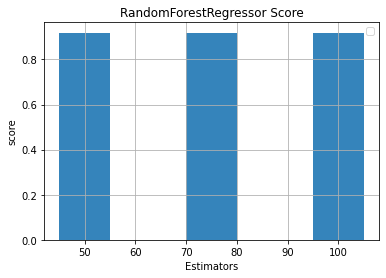

In [ ]:
plt.bar(scoresOfEstimation,scores,10,alpha=.9)
plt.ylabel('score')
plt.xlabel('Estimators')
plt.title('RandomForestRegressor Score')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
0# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Root-mean-squared-error for Random forest regression is: ", rmse_train)

Root-mean-squared-error for Random forest regression is:  9.883513940791913


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
print("R squared for Random forest regression on training data is: ", r2_train)

R squared for Random forest regression on training data is:  0.9891564990290137


In [ ]:
##### Prediction on test data

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("Root-mean-squared-error for Random forest regression is: ", rmse_test)

Root-mean-squared-error for Random forest regression is:  26.37388132022733


In [ ]:
r2_test = r2_score(y_test, y_pred)
print("R squared for Random forest regression on test data is: ", r2_test)

R squared for Random forest regression on test data is:  0.9231179628030808


In [ ]:
rmseTrain.append(rmse_train)
rmseTest.append(rmse_test)
names.append('RFR')

###### 3. XGBoost regression

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

[09:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
XGBpredict_train = XGBModel.predict(X_train)
MAE = mean_absolute_error(y_train , XGBpredict_train)
print('XGBoost training MAE = ',MAE)

XGBoost training MAE =  36.5438201762837


In [ ]:
XGBmse_train = mean_squared_error(y_train, XGBpredict_train)
XGBrmse_train = np.sqrt(XGBmse_train)
print("Root-mean-squared-error for XGB regression is: ", XGBrmse_train)

Root-mean-squared-error for XGB regression is:  60.943948924774034


In [ ]:
XGBpredict_test = XGBModel.predict(X_test)

MAE = mean_absolute_error(y_test , XGBpredict_test)
print('XGBoost test MAE = ',MAE)

XGBoost test MAE =  36.56038192477786


In [ ]:
XGBmse_test = mean_squared_error(y_test, XGBpredict_test)
XGBrmse_test = np.sqrt(XGBmse_test)
print("Root-mean-squared-error for XGB regression is: ", XGBrmse_test)

Root-mean-squared-error for XGB regression is:  60.952817844422704


In [ ]:
XGB_r2_test = r2_score(y_test, XGBpredict_test)
print("R squared for  XGB regression on test data is: ", XGB_r2_test)

R squared for  XGB regression on test data is:  0.5893570576258667


In [ ]:
rmseTrain.append(XGBrmse_train)
rmseTest.append(XGBrmse_test)
names.append('XGR')

###### 4. Neural net regression

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=30, batch_size=54, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/30
20605/20614 [============================>.] - ETA: 0s - loss: 52.9638 - mean_absolute_error: 52.9638
Epoch 00001: val_loss improved from inf to 52.47734, saving model to Weights-001--52.47734.hdf5
20614/20614 [==============================] - 54s 3ms/step - loss: 52.9640 - mean_absolute_error: 52.9640 - val_loss: 52.4773 - val_mean_absolute_error: 52.4773
Epoch 2/30
20594/20614 [============================>.] - ETA: 0s - loss: 52.4173 - mean_absolute_error: 52.4173
Epoch 00002: val_loss improved from 52.47734 to 52.13640, saving model to Weights-002--52.13640.hdf5
20614/20614 [==============================] - 54s 3ms/step - loss: 52.4197 - mean_absolute_error: 52.4197 - val_loss: 52.1364 - val_mean_absolute_error: 52.1364
Epoch 3/30
20609/20614 [============================>.] - ETA: 0s - loss: 52.1068 - mean_absolute_error: 52.1068
Epoch 00003: val_loss improved from 52.13640 to 51.97410, saving model to Weights-003--51.97410.hdf5
20614/20614 [==========================

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-020--38.54793.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_MAE_train = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_MAE_train)

NNmse_train = mean_squared_error(y_train, NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data is: ", NNrmse_train)

NN_r2_train = r2_score(y_train, NNpredict_train)
print("R squared on train data is: ", NN_r2_train)

Test MAE =  38.568338996906334
RMSE on train data is:  76.73707913565032
R squared on train data is:  0.3463318968443173


In [ ]:
NNpredict_test = NN_model.predict(X_test)

In [ ]:
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("RMSE on test data is: ", NNrmse_test)

NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data is: ", NN_r2_test)

Test MAE =  38.57439269074141
RMSE on test data is:  76.6591473964525
R squared on test data is:  0.35046171109387003


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)
names.append('NR')

###### 5. Decision Tree Regression 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(max_depth=13, random_state=1, min_samples_leaf=10)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test , y_pred_test)
MAE_train = mean_absolute_error(y_train , y_pred_train)
print('Mean absolute error for training data = ', MAE_train)
print('Mean absolute error for test data = ', MAE_test)

Mean absolute error for training data =  14.62356600674948
Mean absolute error for test data =  14.89324024270275


In [ ]:
DTmse_train = mean_squared_error(y_train, y_pred_train)
DTrmse_train = np.sqrt(DTmse_train)
print("RMSE for training data is: ", DTrmse_train)

DTmse_test = mean_squared_error(y_test, y_pred_test)
DTrmse_test = np.sqrt(DTmse_test)
print("RMSE for test data is: ", DTrmse_test)

RMSE for training data is:  36.41546470490062
RMSE for test data is:  36.92971081950615


In [ ]:
DTr2_train = r2_score(y_train, y_pred_train)
print("R squared on training data is: ", DTr2_train)

DTr2_test = r2_score(y_test, y_pred_test)
print("R squared on test data is: ", DTr2_test)

R squared on training data is:  0.8527963844039365
R squared on test data is:  0.8492599686521307


In [ ]:
rmseTrain.append(DTrmse_train)
rmseTest.append(DTrmse_test)
names.append('DTR')

###### 5. Models RMSE Comparision Charts

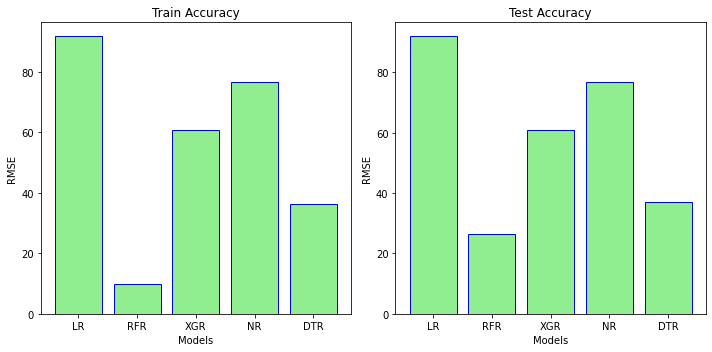

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5)) # 1st width, 2nd height

ax1.bar(names,rmseTrain, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('Train Accuracy')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

ax2.bar(names,rmseTest, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('Test Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

fig.tight_layout()

### **Iteration 2 (Day = 6)**
##### weekdays and months removed ######
##### for weekday = 6 ######

In [ ]:
# ml_df_o = pd.read_csv("/content/sample_data/2018_fulldata_with-weather_cleaned.csv")
ml_df_o = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")
ml_df = ml_df_o[ml_df_o['weekday'] == 6]
ml_df

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
6638,79,6,1,1,0.0,-24,0.0,516
10145,116,6,1,4,0.0,-24,0.0,6
15396,162,6,1,2,0.0,-24,0.0,73
15655,163,6,1,1,0.0,-24,0.0,97
16663,170,6,1,3,0.0,-24,0.0,118
...,...,...,...,...,...,...,...,...
1729195,265,6,9,47,0.0,18,0.0,3
1731913,79,6,9,1,0.0,20,0.0,1
1734167,142,6,9,1,0.0,20,0.0,1
1734602,148,6,9,1,0.0,20,0.0,1


In [ ]:
X = ml_df.drop('count', axis=1)
y = ml_df['count']

In [ ]:
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rmseTest = []
rmseTrain = []
names = []

###### 1. Linear regression

In [ ]:
lr_reg=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr_reg,parameters, cv=None)
grid.fit(X_train, y_train)

lr = grid.best_estimator_
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_lr_train = mean_squared_error(y_train, y_pred_train)
print('RMSE on training data:', np.sqrt(mse_lr_train))

mse_lr_test = mean_squared_error(y_test, y_pred_test)
print('RMSE on test data:', np.sqrt(mse_lr_test))

Coefficients: 
 [ 1.46232908e-01  3.31956684e-13 -7.30025913e-01  5.58402323e-01
 -4.41802908e+01 -4.94967788e-02 -2.05461909e+00]


In [ ]:
print('Coefficient of determination: %.4f on training data'% r2_score(y_train, y_pred_train))
print('Coefficient of determination: %.4f on test data'% r2_score(y_test, y_pred_test))

Coefficient of determination: 0.0295 on training data
Coefficient of determination: 0.0325 on test data


In [ ]:
rmseTrain.append(np.sqrt(mse_lr_train))
rmseTest.append(np.sqrt(mse_lr_test))
names.append('LR')

###### 2. Random Forest Regressor

In [ ]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_train = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Root-mean-squared-error for Random forest regression is: ", rmse_train)

Root-mean-squared-error for Random forest regression is:  8.194867244003904


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
print("R squared for Random forest regression on training data is: ", r2_train)

R squared for Random forest regression on training data is:  0.9897406682751103


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("Root-mean-squared-error for Random forest regression is: ", rmse_test)

Root-mean-squared-error for Random forest regression is:  21.88275686703748


In [ ]:
r2_test = r2_score(y_test, y_pred)
print("R squared for Random forest regression on test data is: ", r2_test)

R squared for Random forest regression on test data is:  0.926272022978338


In [ ]:
rmseTrain.append(rmse_train)
rmseTest.append(rmse_test)
names.append('RFR')

###### 3. XGBoost regression

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

[09:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
XGBpredict_train = XGBModel.predict(X_train)
MAE = mean_absolute_error(y_train , XGBpredict_train)
print('XGBoost training MAE = ',MAE)

XGBoost training MAE =  32.700828582221945


In [ ]:
XGBmse_train = mean_squared_error(y_train, XGBpredict_train)
XGBrmse_train = np.sqrt(XGBmse_train)
print("Root-mean-squared-error for XGB regression is: ", XGBrmse_train)

Root-mean-squared-error for XGB regression is:  54.87927238446607


In [ ]:
XGBpredict_test = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredict_test)
print('XGBoost test MAE = ',MAE)

XGBoost test MAE =  32.70261681998119


In [ ]:
XGBmse_test = mean_squared_error(y_test, XGBpredict_test)
XGBrmse_test = np.sqrt(XGBmse_test)
print("Root-mean-squared-error for XGB regression is: ", XGBrmse_test)

Root-mean-squared-error for XGB regression is:  54.78308492915554


In [ ]:
XGB_r2_test = r2_score(y_test, XGBpredict_test)
print("R squared for  XGB regression on test data is: ", XGB_r2_test)

R squared for  XGB regression on test data is:  0.5379156962052951


In [ ]:
rmseTrain.append(XGBrmse_train)
rmseTest.append(XGBrmse_test)
names.append('XGR')

###### 4. Neural Network *Regressions*

> Neural Network Regression 1




In [ ]:
NN_model = Sequential()

In [ ]:
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=54, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
3063/3074 [============================>.] - ETA: 0s - loss: 45.4876 - mean_absolute_error: 45.4876
Epoch 00001: val_loss improved from inf to 45.33624, saving model to Weights-001--45.33624.hdf5
3074/3074 [==============================] - 8s 3ms/step - loss: 45.4957 - mean_absolute_error: 45.4957 - val_loss: 45.3362 - val_mean_absolute_error: 45.3362
Epoch 2/200
3064/3074 [============================>.] - ETA: 0s - loss: 45.0546 - mean_absolute_error: 45.0546
Epoch 00002: val_loss improved from 45.33624 to 44.50167, saving model to Weights-002--44.50167.hdf5
3074/3074 [==============================] - 8s 3ms/step - loss: 45.0598 - mean_absolute_error: 45.0598 - val_loss: 44.5017 - val_mean_absolute_error: 44.5017
Epoch 3/200
3066/3074 [============================>.] - ETA: 0s - loss: 43.9437 - mean_absolute_error: 43.9437
Epoch 00003: val_loss improved from 44.50167 to 43.93211, saving model to Weights-003--43.93211.hdf5
3074/3074 [==============================] - 8s 

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-179--26.51456.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_MAE_train = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_MAE_train)

NNmse_train = mean_squared_error(y_train, NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data is: ", NNrmse_train)

Test MAE =  26.501472838520836
RMSE on train data is:  58.56726139871635


In [ ]:
NNpredict_test = NN_model.predict(X_test)

In [ ]:
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("Root-mean-squared-error is: ", NNrmse_test)

NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

Test MAE =  26.301725039246858
Root-mean-squared-error is:  57.47967037866064
R squared on test data:  0.4913058004684141


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)
names.append('NN1')

> Neural Network Regression 2

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
5171/5187 [============================>.] - ETA: 0s - loss: 45.5389 - mean_absolute_error: 45.5389
Epoch 00001: val_loss improved from inf to 45.24452, saving model to Weights-001--45.24452.hdf5
5187/5187 [==============================] - 13s 3ms/step - loss: 45.5498 - mean_absolute_error: 45.5498 - val_loss: 45.2445 - val_mean_absolute_error: 45.2445
Epoch 2/200
5176/5187 [============================>.] - ETA: 0s - loss: 45.1450 - mean_absolute_error: 45.1450
Epoch 00002: val_loss improved from 45.24452 to 44.70746, saving model to Weights-002--44.70746.hdf5
5187/5187 [==============================] - 13s 3ms/step - loss: 45.1339 - mean_absolute_error: 45.1339 - val_loss: 44.7075 - val_mean_absolute_error: 44.7075
Epoch 3/200
5183/5187 [============================>.] - ETA: 0s - loss: 44.2214 - mean_absolute_error: 44.2214
Epoch 00003: val_loss improved from 44.70746 to 43.00394, saving model to Weights-003--43.00394.hdf5
5187/5187 [==============================] - 1

In [ ]:
# Load weights file of the best model :
wights_file = 'Weights-192--31.45438.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_MAE_train = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_MAE_train)

NNmse_train = mean_squared_error(y_train, NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data is: ", NNrmse_train)

Test MAE =  31.52569267166467
RMSE on train data is:  68.13183081163814


In [ ]:
NNpredict_test = NN_model.predict(X_test)
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("RMSE on test data: ", NNrmse_test)

NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

Test MAE =  31.123157763374497
RMSE on test data:  66.87697335285111
R squared on test data:  0.31137708938817965


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)
names.append('NN2')

###### 5. Decision Tree Regression

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test , y_pred_test)
MAE_train = mean_absolute_error(y_train , y_pred_train)
print('Mean absolute error for training data = ', MAE_train)
print('Mean absolute error for test data = ', MAE_test)

Mean absolute error for training data =  0.0
Mean absolute error for test data =  11.034511346328108


In [ ]:
DTmse_train = mean_squared_error(y_train, y_pred_train)
DTrmse_train = np.sqrt(DTmse_train)
print("RMSE for training data is: ", DTrmse_train)

DTmse_test = mean_squared_error(y_test, y_pred_test)
DTrmse_test = np.sqrt(DTmse_test)
print("RMSE for test data is: ", DTrmse_test)

RMSE for training data is:  0.0
RMSE for test data is:  28.056610719316


In [ ]:
rmseTrain.append(DTrmse_train)
rmseTest.append(DTrmse_test)
names.append('DTR')

###### 5. Models RMSE Comparision Charts

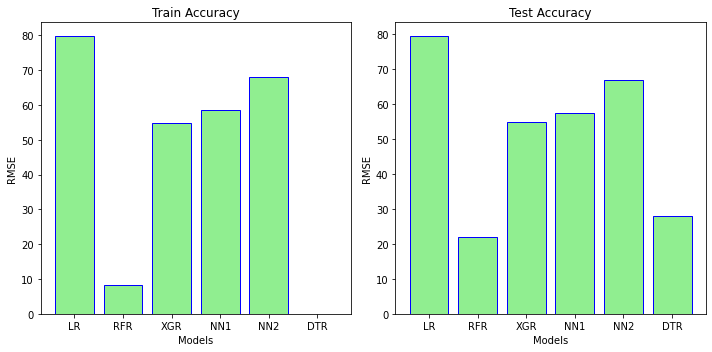

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5)) # 1st width, 2nd height

ax1.bar(names,rmseTrain, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('Training')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

ax2.bar(names,rmseTest, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('Test')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

fig.tight_layout()

### **Iteration 3 (Day = 3)**
##### weekdays and months removed ######
##### for weekday = 3 ######

In [ ]:
# ml_df_o = pd.read_csv("/content/sample_data/2018_fulldata_with-weather_cleaned.csv")
ml_df_o = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")
ml_df = ml_df_o[ml_df_o['weekday'] == 3]
ml_df

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
21,1,3,1,7,0.0,-10,0.0,2
22,1,3,1,31,0.0,-12,0.2,1
23,1,3,1,33,0.0,-12,0.1,1
24,1,3,1,39,0.0,-13,0.0,1
40,3,3,1,3,0.0,-10,0.0,1
...,...,...,...,...,...,...,...,...
1739177,265,3,9,44,0.0,19,1.1,2
1739178,265,3,9,45,0.0,19,0.5,3
1739179,265,3,9,46,0.0,19,0.5,3
1739180,265,3,9,47,0.0,18,0.0,1


In [ ]:
X = ml_df.drop('count', axis=1)
y = ml_df['count']

In [ ]:
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rmseTest = []
rmseTrain = []
names = []

###### 1. Linear regression

In [ ]:
lr_reg=LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr_reg,parameters, cv=None)
grid.fit(X_train, y_train)

lr = grid.best_estimator_
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_lr_train = mean_squared_error(y_train, y_pred_train)
print('RMSE on training data:', np.sqrt(mse_lr_train))

mse_lr_test = mean_squared_error(y_test, y_pred_test)
print('RMSE on test data:', np.sqrt(mse_lr_test))

Coefficients: 
 [ 2.40458350e-01  4.44089210e-16 -1.59179341e+00  1.52060658e+00
 -6.81153217e-01  2.32380144e-01 -5.58615658e+00]


In [ ]:
print('Coefficient of determination: %.4f on training data'% r2_score(y_train, y_pred_train))
print('Coefficient of determination: %.4f on test data'% r2_score(y_test, y_pred_test))

Coefficient of determination: 0.0774 on training data
Coefficient of determination: 0.0770 on test data


In [ ]:
rmseTrain.append(np.sqrt(mse_lr_train))
rmseTest.append(np.sqrt(mse_lr_test))
names.append('LR')

###### 2. Random Forest Regressor

In [ ]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_train = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Root-mean-squared-error for Random forest regression is: ", rmse_train)

Root-mean-squared-error for Random forest regression is:  9.781617364900368


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
print("R squared for Random forest regression on training data is: ", r2_train)

R squared for Random forest regression on training data is:  0.9907791910892086


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("Root-mean-squared-error for Random forest regression is: ", rmse_test)

Root-mean-squared-error for Random forest regression is:  25.9167370954969


In [ ]:
r2_test = r2_score(y_test, y_pred)
print("R squared for Random forest regression on test data is: ", r2_test)

R squared for Random forest regression on test data is:  0.9350909413153605


In [ ]:
rmseTrain.append(rmse_train)
rmseTest.append(rmse_test)
names.append('RFR')

###### 3. XGBoost regression

In [ ]:
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

[11:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
XGBpredict_train = XGBModel.predict(X_train)
MAE = mean_absolute_error(y_train , XGBpredict_train)
print('XGBoost training MAE = ',MAE)

XGBoost training MAE =  38.54418588763687


In [ ]:
XGBmse_train = mean_squared_error(y_train, XGBpredict_train)
XGBrmse_train = np.sqrt(XGBmse_train)
print("Root-mean-squared-error for XGB regression is: ", XGBrmse_train)

Root-mean-squared-error for XGB regression is:  62.00136508760731


In [ ]:
XGBpredict_test = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredict_test)
print('XGBoost test MAE = ',MAE)

XGBoost test MAE =  38.455884332844185


In [ ]:
XGBmse_test = mean_squared_error(y_test, XGBpredict_test)
XGBrmse_test = np.sqrt(XGBmse_test)
print("Root-mean-squared-error for XGB regression is: ", XGBrmse_test)

Root-mean-squared-error for XGB regression is:  62.11565289804196


In [ ]:
XGB_r2_test = r2_score(y_test, XGBpredict_test)
print("R squared for  XGB regression on test data is: ", XGB_r2_test)

R squared for  XGB regression on test data is:  0.627139160066134


In [ ]:
rmseTrain.append(XGBrmse_train)
rmseTest.append(XGBrmse_test)
names.append('XGR')

###### 4. Neural Network *Regressions*

> Neural Network Regression 1




In [ ]:
NN_model = Sequential()

In [ ]:
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=54, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
2932/2943 [============================>.] - ETA: 0s - loss: 57.5510 - mean_absolute_error: 57.5510
Epoch 00001: val_loss improved from inf to 56.76984, saving model to Weights-001--56.76984.hdf5
2943/2943 [==============================] - 8s 3ms/step - loss: 57.5481 - mean_absolute_error: 57.5481 - val_loss: 56.7698 - val_mean_absolute_error: 56.7698
Epoch 2/200
2937/2943 [============================>.] - ETA: 0s - loss: 57.2779 - mean_absolute_error: 57.2779
Epoch 00002: val_loss improved from 56.76984 to 56.60415, saving model to Weights-002--56.60415.hdf5
2943/2943 [==============================] - 8s 3ms/step - loss: 57.2733 - mean_absolute_error: 57.2733 - val_loss: 56.6041 - val_mean_absolute_error: 56.6041
Epoch 3/200
2926/2943 [============================>.] - ETA: 0s - loss: 57.1229 - mean_absolute_error: 57.1229
Epoch 00003: val_loss improved from 56.60415 to 56.38025, saving model to Weights-003--56.38025.hdf5
2943/2943 [==============================] - 8s 

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-121--31.64528.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_MAE_train = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_MAE_train)

NNmse_train = mean_squared_error(y_train, NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data is: ", NNrmse_train)

Test MAE =  31.61067371036085
RMSE on train data is:  66.4829436647254


In [ ]:
NNpredict_test = NN_model.predict(X_test)

In [ ]:
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("Root-mean-squared-error is: ", NNrmse_test)

NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

Test MAE =  31.45422795600195
Root-mean-squared-error is:  66.54516563356246
R squared on test data:  0.5720651208652126


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)
names.append('NN1')

> Neural Network Regression 2

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
4947/4966 [============================>.] - ETA: 0s - loss: 57.5119 - mean_absolute_error: 57.5119
Epoch 00001: val_loss improved from inf to 57.35273, saving model to Weights-001--57.35273.hdf5
4966/4966 [==============================] - 13s 3ms/step - loss: 57.5280 - mean_absolute_error: 57.5280 - val_loss: 57.3527 - val_mean_absolute_error: 57.3527
Epoch 2/200
4966/4966 [==============================] - ETA: 0s - loss: 57.2593 - mean_absolute_error: 57.2593
Epoch 00002: val_loss improved from 57.35273 to 56.55249, saving model to Weights-002--56.55249.hdf5
4966/4966 [==============================] - 13s 3ms/step - loss: 57.2593 - mean_absolute_error: 57.2593 - val_loss: 56.5525 - val_mean_absolute_error: 56.5525
Epoch 3/200
4963/4966 [============================>.] - ETA: 0s - loss: 57.1447 - mean_absolute_error: 57.1447
Epoch 00003: val_loss did not improve from 56.55249
4966/4966 [==============================] - 13s 3ms/step - loss: 57.1429 - mean_absolute_error

In [ ]:
# Load weights file of the best model :
wights_file = 'Weights-139--36.04659.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
NNpredict_train = NN_model.predict(X_train)

In [ ]:
NN_MAE_train = mean_absolute_error(y_train , NNpredict_train)
print('Test MAE = ',NN_MAE_train)

NNmse_train = mean_squared_error(y_train, NNpredict_train)
NNrmse_train = np.sqrt(NNmse_train)
print("RMSE on train data is: ", NNrmse_train)

Test MAE =  35.9480905188024
RMSE on train data is:  72.43676288150786


In [ ]:
NNpredict_test = NN_model.predict(X_test)
NN_MAE = mean_absolute_error(y_test , NNpredict_test)
print('Test MAE = ',NN_MAE)

NNmse_test = mean_squared_error(y_test, NNpredict_test)
NNrmse_test = np.sqrt(NNmse_test)
print("RMSE on test data: ", NNrmse_test)

NN_r2_test = r2_score(y_test, NNpredict_test)
print("R squared on test data: ", NN_r2_test)

Test MAE =  35.96364257759474
RMSE on test data:  72.71858617138213
R squared on test data:  0.4889828003346075


In [ ]:
rmseTrain.append(NNrmse_train)
rmseTest.append(NNrmse_test)
names.append('NN2')

###### 5. Decision Tree Regression

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [ ]:
MAE_test = mean_absolute_error(y_test , y_pred_test)
MAE_train = mean_absolute_error(y_train , y_pred_train)
print('Mean absolute error for training data = ', MAE_train)
print('Mean absolute error for test data = ', MAE_test)

Mean absolute error for training data =  0.0
Mean absolute error for test data =  12.435749239784924


In [ ]:
DTmse_train = mean_squared_error(y_train, y_pred_train)
DTrmse_train = np.sqrt(DTmse_train)
print("RMSE for training data is: ", DTrmse_train)

DTmse_test = mean_squared_error(y_test, y_pred_test)
DTrmse_test = np.sqrt(DTmse_test)
print("RMSE for test data is: ", DTrmse_test)

RMSE for training data is:  0.0
RMSE for test data is:  32.85306748135599


In [ ]:
rmseTrain.append(DTrmse_train)
rmseTest.append(DTrmse_test)
names.append('DTR')

###### 5. Models RMSE Comparision Charts

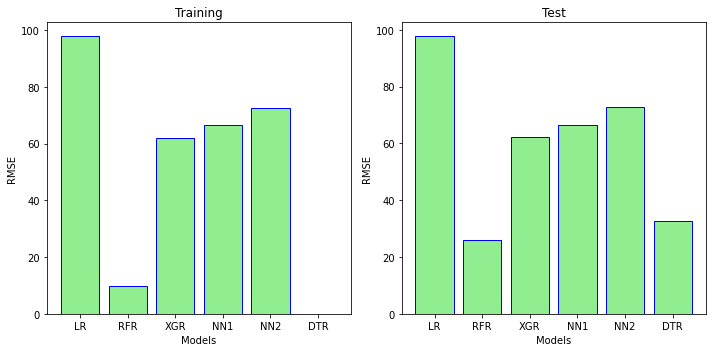

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,5)) # 1st width, 2nd height

ax1.bar(names,rmseTrain, color= 'lightgreen', edgecolor = 'b')
ax1.set_title('Training')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')

ax2.bar(names,rmseTest, color= 'lightgreen', edgecolor = 'b')
ax2.set_title('Test')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')

fig.tight_layout()

## Final Model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [ ]:
ml_df_o = pd.read_csv("/content/drive/MyDrive/MachinLearning/2018_fulldata_with-weather_cleaned.csv")
ml_df_o.sample(10)

,pulid,weekday,month,time_code,totalSnow_cm,FeelsLikeC,precipMM,count
906659,188,0,4,17,0.0,0,0.0,3
634456,45,5,2,33,0.0,4,0.9,25
944165,170,5,4,43,0.0,5,0.0,230
1021544,76,2,5,13,0.0,21,0.0,1
999241,151,3,4,1,0.0,12,0.0,14
1057340,263,0,5,40,0.0,16,0.0,138
530772,7,4,12,9,0.0,12,2.1,7
564638,142,4,12,37,0.0,10,0.0,280
1725255,232,0,9,41,0.0,17,0.1,12
399816,196,2,11,30,0.0,2,0.0,1


*******For Day: 0



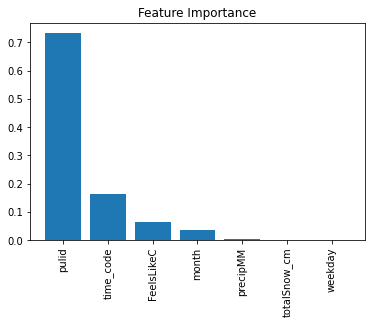

Feature: pulid, importance: 0.7324228972810746
Feature: weekday, importance: 0.0
Feature: month, importance: 0.03431301038928395
Feature: time_code, importance: 0.1641664159229979
Feature: totalSnow_cm, importance: 0.001403719866778137
Feature: FeelsLikeC, importance: 0.06456943767888594
Feature: precipMM, importance: 0.0031245188609795587

Mean cross validation score: 0.8509373815126617
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  12.280224948875256
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.6736193089983978
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20}

*******For Day: 1



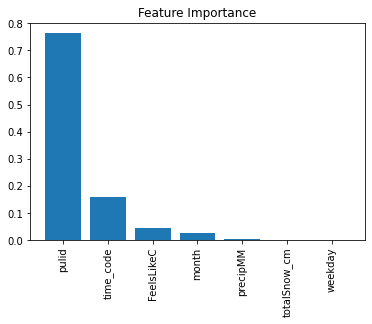

Feature: pulid, importance: 0.7632644386084797
Feature: weekday, importance: 0.0
Feature: month, importance: 0.027590519299486676
Feature: time_code, importance: 0.1588560040173765
Feature: totalSnow_cm, importance: 0.0018902789900947427
Feature: FeelsLikeC, importance: 0.045181886247794754
Feature: precipMM, importance: 0.003216872836767493

Mean cross validation score: 0.8889861819782098
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  11.887591741269457
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.7459508569967037
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 40}

*******For Day: 2



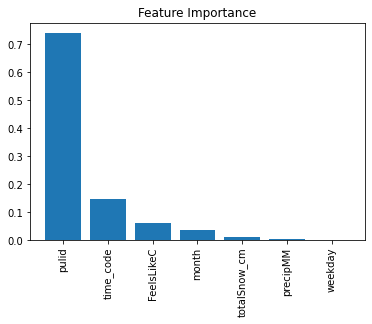

Feature: pulid, importance: 0.7403149839894516
Feature: weekday, importance: 0.0
Feature: month, importance: 0.03672016598028118
Feature: time_code, importance: 0.14803857950129912
Feature: totalSnow_cm, importance: 0.01029169909926207
Feature: FeelsLikeC, importance: 0.06038812971312979
Feature: precipMM, importance: 0.004246441716576163

Mean cross validation score: 0.8662333997164161
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  13.068737888886522
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.7159637668448277
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20}

*******For Day: 3



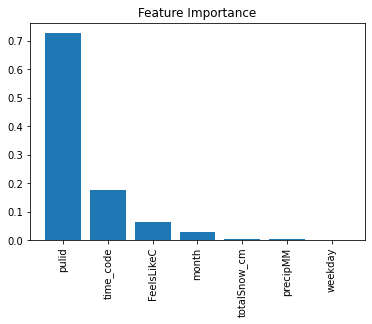

Feature: pulid, importance: 0.7272136673184134
Feature: weekday, importance: 0.0
Feature: month, importance: 0.02904604179609498
Feature: time_code, importance: 0.1746282856137197
Feature: totalSnow_cm, importance: 0.003430151154573927
Feature: FeelsLikeC, importance: 0.062411729481491714
Feature: precipMM, importance: 0.0032701246357063046

Mean cross validation score: 0.8796436174005468
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  12.406327406005195
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.7249249121916699
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 40}

*******For Day: 4



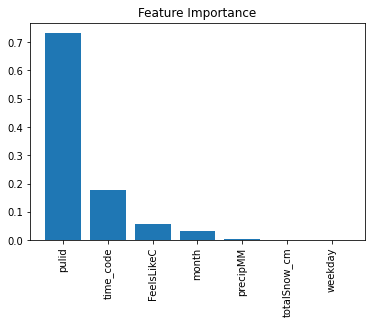

Feature: pulid, importance: 0.732173893428893
Feature: weekday, importance: 0.0
Feature: month, importance: 0.03151422638857882
Feature: time_code, importance: 0.17611646071916623
Feature: totalSnow_cm, importance: 0.0007820703559209564
Feature: FeelsLikeC, importance: 0.05551712519199298
Feature: precipMM, importance: 0.0038962239154479825

Mean cross validation score: 0.876663194321577
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  12.404474600411458
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.6710960107996676
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20}

*******For Day: 5



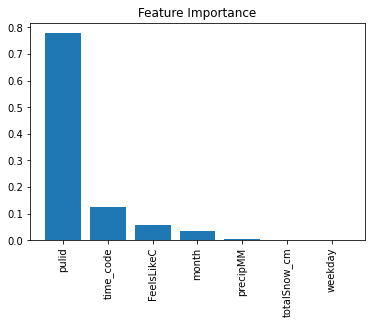

Feature: pulid, importance: 0.7781829438081764
Feature: weekday, importance: 0.0
Feature: month, importance: 0.03588104090913289
Feature: time_code, importance: 0.12445407136350248
Feature: totalSnow_cm, importance: 0.0
Feature: FeelsLikeC, importance: 0.05852158891844348
Feature: precipMM, importance: 0.0029603550007446648

Mean cross validation score: 0.8570864169490555
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  12.318653364601136
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.5547150818635753
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 40}

*******For Day: 6



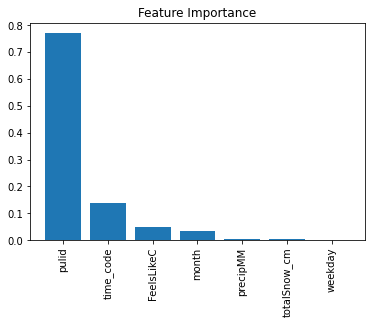

Feature: pulid, importance: 0.7701600972809605
Feature: weekday, importance: 0.0
Feature: month, importance: 0.03302920420998487
Feature: time_code, importance: 0.13904211484405765
Feature: totalSnow_cm, importance: 0.0031300647759451507
Feature: FeelsLikeC, importance: 0.05035683448231196
Feature: precipMM, importance: 0.0042816844067398805

Mean cross validation score: 0.868173178934297
Score without cv: 1.0
Mean absolute error for training data =  0.0
Mean absolute error for test data =  11.004820020436886
Root-mean-squared-error for XGB regression is:  0.0
R-Squared::0.5986031082079668
Best Hyperparameters::
{'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 40}



In [ ]:
models = []
for wday in range(7):

  ml_df = ml_df_o[ml_df_o['weekday'] == wday]

  X = ml_df.drop('count', axis=1)
  y = ml_df['count']
  # split training and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  regressor = DecisionTreeRegressor()
  dt_fit  = regressor.fit(X_train, y_train)

  y_pred_train = regressor.predict(X_train)
  y_pred_test = regressor.predict(X_test)

  print('*******For Day:', wday)
  print()
  # get importance
  importances = regressor.feature_importances_
  # summarize feature importance

  # Sort feature importance in descending order
  indices = np.argsort(importances)[::-1]

  # Rearrange feature names so they match the sorted feature importances
  names = [X_train.columns[i] for i in indices]

  # Create plot
  pyplot.figure()
  # Create plot title
  pyplot.title("Feature Importance")
  # Add bars
  pyplot.bar(range(X_train.shape[1]), importances[indices])
  # Add feature names as x-axis labels
  pyplot.xticks(range(X_train.shape[1]), names, rotation=90)
  # Show plot
  pyplot.show()

 
  for feat, importance in zip(X_train.columns, importances):
    print ('Feature: {f}, importance: {i}'.format( f=feat, i=importance))

  dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)

  print()
  print("Mean cross validation score: {}".format(np.mean(dt_scores)))
  print("Score without cv: {}".format(dt_fit.score(X_train, y_train)))

  MAE_test = mean_absolute_error(y_test , y_pred_test)
  MAE_train = mean_absolute_error(y_train , y_pred_train)

  DTmse_train = mean_squared_error(y_train, y_pred_train)
  DTrmse_train = np.sqrt(DTmse_train)

  print('Mean absolute error for training data = ', MAE_train)
  print('Mean absolute error for test data = ', MAE_test)
  print("Root-mean-squared-error for XGB regression is: ", DTrmse_train)
  
  param_grid = {"max_depth": [6, 8],
              "min_samples_leaf": [20, 40],
              "max_leaf_nodes": [5, 20, 100],
              }

  # Hyper Tunning
  grid_cv_dtm = GridSearchCV(regressor, param_grid, cv=5)
  grid_cv_dtm.fit(X_train, y_train)
  print("R-Squared::{}".format(grid_cv_dtm.best_score_))
  print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))
  print('')

  models.append(regressor)

[Text(91.323654703981, 215.175, 'X[3] <= 13.5\nmse = 8551.383\nsamples = 195598\nvalue = 53.779'),
 Text(11.094600454214708, 210.645, 'X[5] <= -18.5\nmse = 973.88\nsamples = 47433\nvalue = 16.031'),
 Text(1.3625241220274968, 206.115, 'X[3] <= 6.5\nmse = 5872.266\nsamples = 1344\nvalue = 45.395'),
 Text(0.8643510671581857, 201.585, 'X[0] <= 228.5\nmse = 9124.743\nsamples = 625\nvalue = 65.195'),
 Text(0.6406265989307399, 197.055, 'X[0] <= 170.5\nmse = 8602.522\nsamples = 500\nvalue = 55.924'),
 Text(0.4694254725942569, 192.525, 'X[0] <= 169.5\nmse = 9969.506\nsamples = 397\nvalue = 66.589'),
 Text(0.20370354568833612, 187.995, 'X[0] <= 42.5\nmse = 9084.945\nsamples = 392\nvalue = 63.117'),
 Text(0.04751137577722723, 183.465, 'X[0] <= 8.0\nmse = 495.944\nsamples = 76\nvalue = 21.237'),
 Text(0.014125323167613637, 178.935, 'X[3] <= 3.5\nmse = 789.021\nsamples = 12\nvalue = 45.25'),
 Text(0.006053709928977273, 174.405, 'X[0] <= 3.5\nmse = 332.139\nsamples = 6\nvalue = 21.167'),
 Text(0.004

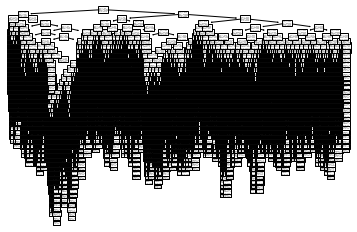

In [ ]:
from sklearn import tree
tree.plot_tree(models[0])